# Simple Linear Regression - PyTorch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
import torch.nn as nn

In [3]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [4]:
# X

In [5]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)
# print(e)

In [6]:
y = 2*X + 1 + e

In [7]:
y.shape

torch.Size([50, 1])

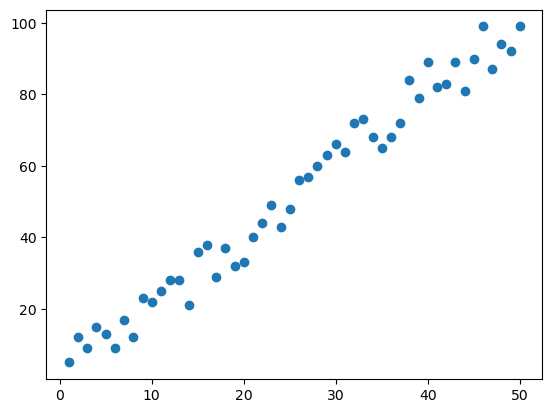

In [8]:
plt.scatter(X.numpy(), y.numpy());

In [9]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [10]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [11]:
torch.manual_seed(59)

model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [12]:
for name,param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [13]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [14]:
x1 = np.linspace(0.0,50.0,50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [15]:
w1 = 0.1060
b1 = 0.9638
y1 = w1*x1+b1
y1

array([0.9638    , 1.07196327, 1.18012653, 1.2882898 , 1.39645306,
       1.50461633, 1.61277959, 1.72094286, 1.82910612, 1.93726939,
       2.04543265, 2.15359592, 2.26175918, 2.36992245, 2.47808571,
       2.58624898, 2.69441224, 2.80257551, 2.91073878, 3.01890204,
       3.12706531, 3.23522857, 3.34339184, 3.4515551 , 3.55971837,
       3.66788163, 3.7760449 , 3.88420816, 3.99237143, 4.10053469,
       4.20869796, 4.31686122, 4.42502449, 4.53318776, 4.64135102,
       4.74951429, 4.85767755, 4.96584082, 5.07400408, 5.18216735,
       5.29033061, 5.39849388, 5.50665714, 5.61482041, 5.72298367,
       5.83114694, 5.9393102 , 6.04747347, 6.15563673, 6.2638    ])

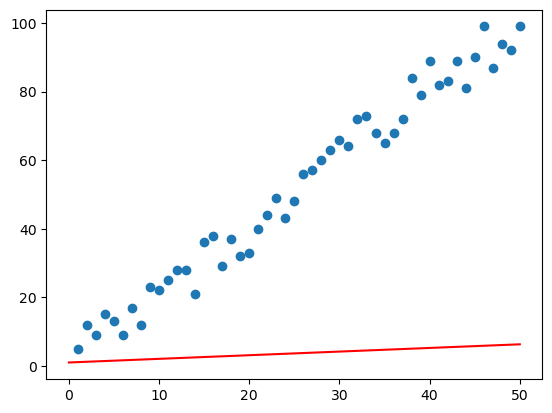

In [16]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r');

In [17]:
criterion = nn.MSELoss()

In [18]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [19]:
epochs = 50
losses = []

for i in range(epochs):
    i = i + 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)

    print(f"epoch {1} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()} ")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277 
epoch 1 loss: 1588.5311279296875 weight: 3.334900379180908 bias: 1.0604636669158936 
epoch 1 loss: 830.2999877929688 weight: 1.0148327350616455 bias: 0.9922628402709961 
epoch 1 loss: 438.8524169921875 weight: 2.6817996501922607 bias: 1.0425218343734741 
epoch 1 loss: 236.7615203857422 weight: 1.4840211868286133 bias: 1.0076650381088257 
epoch 1 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504 
epoch 1 loss: 78.56572723388672 weight: 1.7262253761291504 bias: 1.0163217782974243 
epoch 1 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122 
epoch 1 loss: 36.4012565612793 weight: 1.851245641708374 bias: 1.0214954614639282 
epoch 1 loss: 28.989229202270508 weight: 2.0806007385253906 bias: 1.029038906097412 
epoch 1 loss: 25.162382125854492 weight: 1.9157683849334717 bias: 1.0248701572418213 
epoch 1 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.02

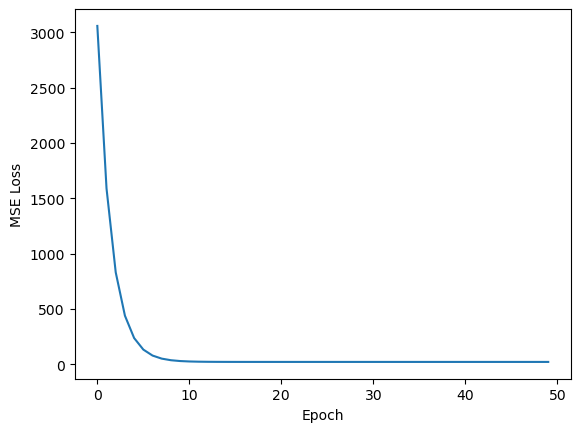

In [20]:
with torch.no_grad():
    plt.plot(range(epochs),losses)
    plt.ylabel('MSE Loss')
    plt.xlabel("Epoch")

In [46]:
x = np.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

In [50]:
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

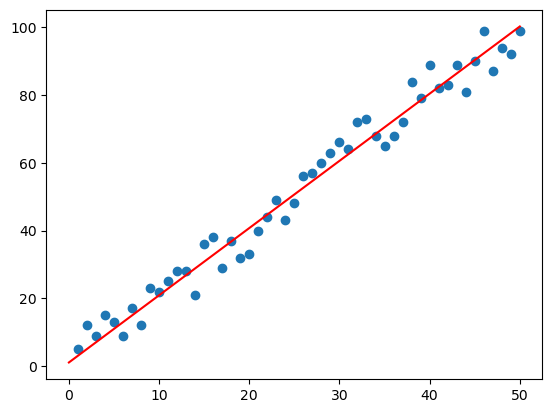

In [52]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')